In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('/content/drive/MyDrive/추천시스템 입문/data/ml-latest-small/ratings.csv')
ratings.sample()

,userId,movieId,rating,timestamp
46851,307,616,2.5,1186085259


In [3]:
print(len(ratings['userId'].unique()))

610


In [4]:
print(len(ratings['movieId'].unique()))

9724


In [6]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

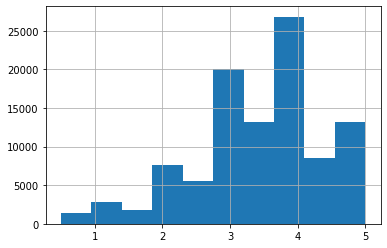

In [9]:
%matplotlib inline
ratings['rating'].hist()

### 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [11]:
users = ratings.groupby('userId')['movieId'].count()
users

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [12]:
users.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


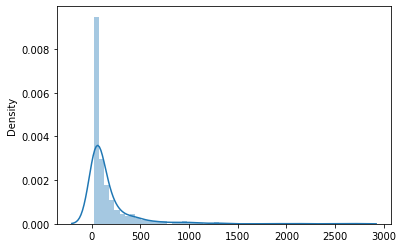

In [16]:
#power law distribution, 멱함수 분포
#영화를 적게 본 사람들이 대부분이고 영화를 많이 본 사람은 소수
#평균을 해석하는 설명력이 떨어짐. quantile을 보는 것을 권장(25%, 50%, 75%...)
sns.distplot(users.values)

### 사람들이 많이 보는 영화는?

In [18]:
films = ratings.groupby('movieId')['userId'].count()
films

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

In [19]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


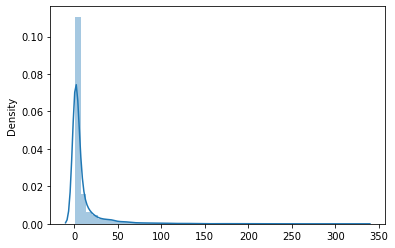

In [20]:
#역시 power law distribution
#소수의 영화들만 소비됨, 나머지 대부분의 컨텐츠들은 소비되지 않고 있음 
sns.distplot(films.values)

In [24]:
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

In [26]:
movies = pd.read_csv('/content/drive/MyDrive/추천시스템 입문/data/movies.csv', index_col='movieId')

In [28]:
movies.loc[[356,318,296,593,2571]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### 겨울왕국 평점보기

In [29]:
#movieId = 106695
movies.loc[106696]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [32]:
frozen = ratings[ratings['movieId'] == 106696]

In [33]:
len(frozen)

29

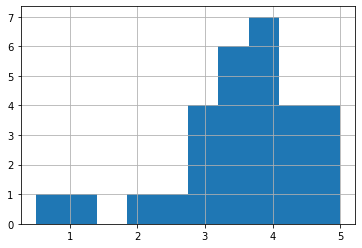

In [35]:
frozen['rating'].hist()

In [38]:
#겨울왕국에 0.5점 준 사람의 평점부여 패턴 분석
ratings[ratings['userId'] == 567]

,userId,movieId,rating,timestamp
87791,567,1,3.5,1525286001
87792,567,34,2.5,1525288053
87793,567,50,1.0,1525282012
87794,567,101,3.0,1525287210
87795,567,260,2.0,1525288368
...,...,...,...,...
88171,567,180031,4.0,1525284143
88172,567,180985,1.0,1525285297
88173,567,182823,1.0,1525289422
88174,567,183897,3.5,1525282061


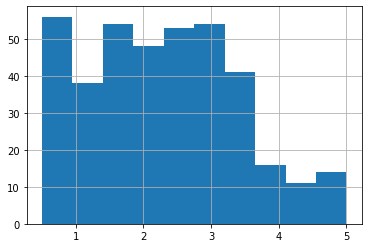

In [39]:
#밑의 rating 전체 히스토그램과 비교해보았을 때 567번은 점수를 짜게 주는 편이었다!
ratings.loc[ratings['userId'] == 567, 'rating'].hist()

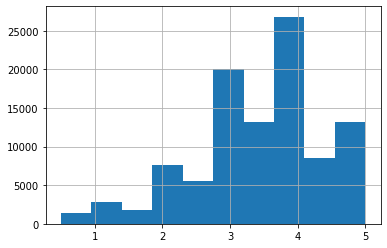

In [40]:
ratings['rating'].hist()